# APPRENTISSAGE NON SUPERVISE

Qu'est-ce que c'est l'apprentissage non supervisé ? C'est une méthode d'apprentissage dans laquelle, au lieu de montrer à la machine des exemples (x), (y) de ce qu'elle doit apprendre, on lui fournit uniquement des données (x) et on lui demande d'analyser la structure de ces données pour apprendre elle même à réaliser certaines tâches.(La mahine apprend par elle même à découvrir la structure sous-jacentes de données)

>Par exemple la machine peut apprendre à classer les données on leur regroupant uniquement selon leur ressemblance, c'est ce que l'on appelle faire du **Clustering** (Classification non supervisée en Français).

Avec cette technique on peut faire énormement des choses comme: 
<u>
    <li>Classer des documents</li>
    <li>Photos</li><li>Tweets</li>
    <li>Segmenter la clientèle d'une entreprise</li>
    <li>Les produits ou articles d'un magasin etc.</li>
    
</u>
                        
avec l'algorithme **K-Means Clustering**
____________________________________________


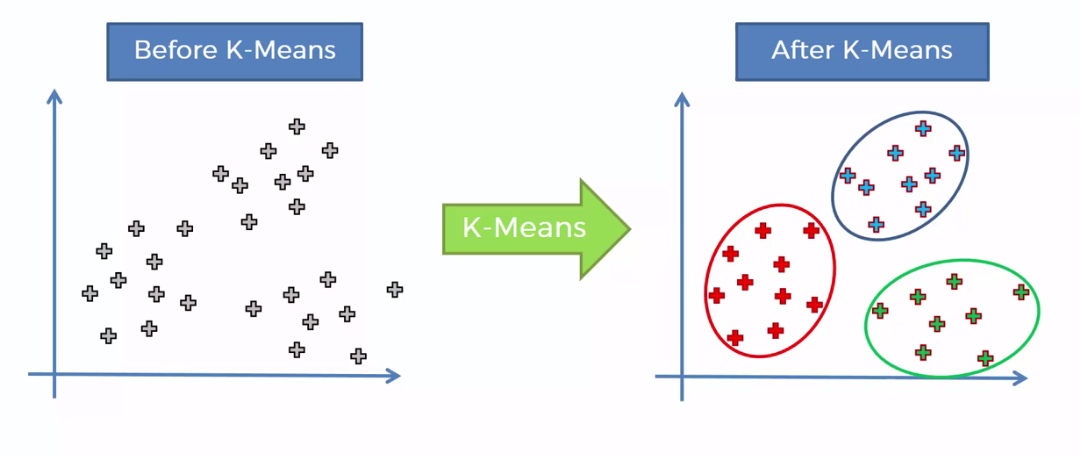

Une autre tâche que la machine peut faire grace à l'apprentissage non supervisé est la **Détection d'anomalie**.
La machine analyse la structure de nos données et parvient à trouver des échantillons dont les caractéristiques(x) sont très éloignées des celles des autres échantillons.

Et ça nous permet de développer des systèmes de:
<u>
    <li>Sécurités</li>
    <li>détection de fraude bancaire</li>
    <li>détection de défaillances techniques</li>
</u>

avec l'algorithme **Isolation Forest**
_______________________________________

**La reduction de la dimensionalité**

En analysant la tructure de nos données la machine est capable d'apprendre comment simplifier cette structure tout en conservant les principales informations avec l'algorithme **PCA** (Analyse en composantes Principales).

On peut:
- **simplifier la complexité superflue** que pourrait avoir un dataset, ce qui facilite beaucoup l'apprentissage de la machine pour des problème de régression ou de classification
- Visualiser en 2 dimensions ou 3 dimensions les espaces qui vont bien au-délà de notre imagination.

# K-Means Clustering

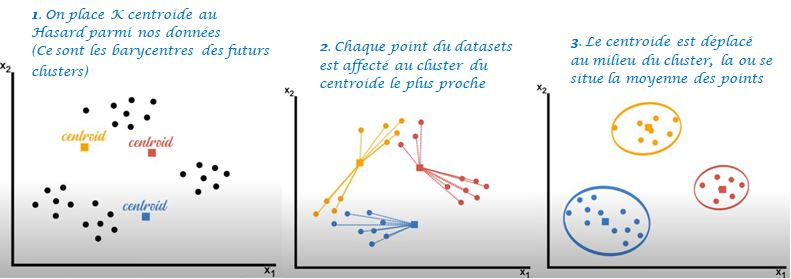

C'est un algorithme itérative qui fonctionne en deux étape On affecte les points du dataset au centroide le plus proche, on calcule la moyenne de chaque cluster et on y déplace le centroide.

Selon la position initiale de notre centroide K-Mean peut donner de mauvais clusters (converge vers de mauvaise position)
La solution est d'executer K-mean avec différentes postitions de départ, la solution retenue sera celle qui minimise la somme des distances entre les points d'un cluster et son centre (cela équivaut à minimiser la variance des clusters).

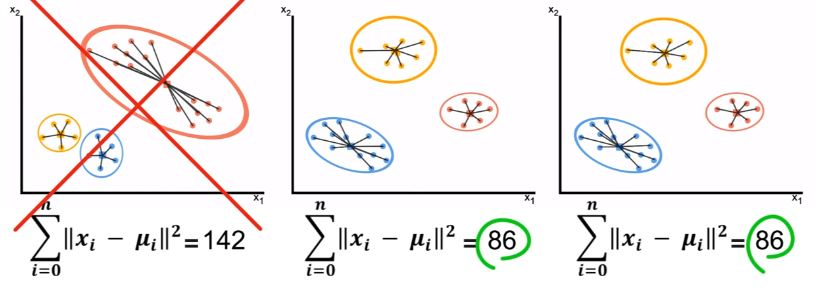

In [42]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

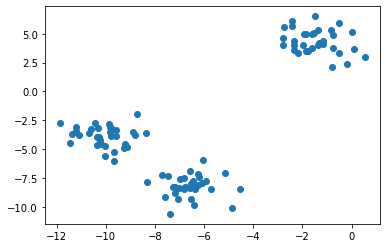

In [43]:
#Génération des données
X, y=make_blobs(n_samples=100, centers=3, random_state=1)
model=KMeans(n_clusters=3)
plt.scatter(X[:,0], X[:,1])

156.28289251170003

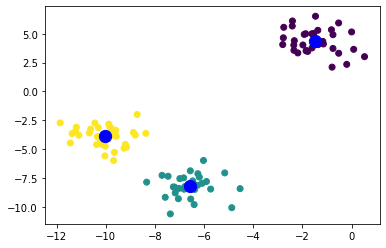

In [49]:
model=KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

#Affichage de la position finale de nos centroides
model.cluster_centers_
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='b', s=150)
#calcule de l'inertia (la fonction coût de notre modèle)
model.inertia_


Dans cet exemple il a été facile de définir n_clusters car on a pu voir 3).
Mais dans la pratique un dataset peut avoir de nombreuses dimensions et donc il peut être difficle de voir un nombre de clusters à l'oeil. Alors comment les déterminer?

## Elbow Method

Determine une zone de coude pour la minimisation du coût (inertia_), cette zone nous indique le nombre de clusters optimalcàd celui qui nous permet de reduire au maximum le coût de notre modèle tout en conservant un nombre raisonnable de clusters

In [5]:
liste_coût = []
k_range=range(1,20)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X)
    liste_coût.append(model.inertia_)

Text(0, 0.5, 'Coût du modèle (inertia)')

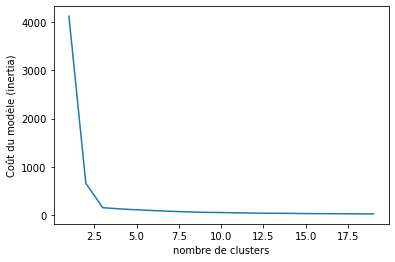

In [6]:
plt.plot(k_range,liste_coût)
plt.xlabel('nombre de clusters')
plt.ylabel('Coût du modèle (inertia)')

### Interpretation

On peut voir et verifier que le coude est situé dans la zone  2,5 et donc précisement 3.

# Détection d'anomalie

In [14]:
import numpy as np

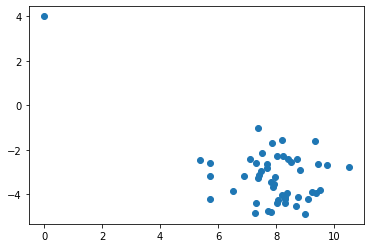

In [15]:
X,y=make_blobs(n_samples=50,centers=1, cluster_std=1, random_state=6)
X[-1,:]=np.array([0,4])
plt.scatter(X[:,0], X[:,1])

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
model = IsolationForest(contamination=0.18, random_state=0)

In [18]:
model.fit(X)

IsolationForest(contamination=0.18, random_state=0)

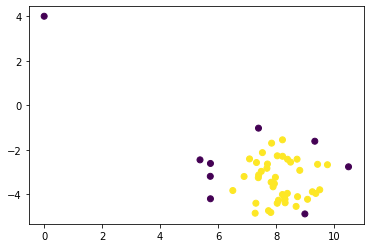

In [19]:
plt.scatter(X[:,0],X[:,1], c=model.predict(X))

# Application Décontamination Digits

In [20]:
from sklearn.datasets import load_digits

In [21]:
digits=load_digits()
images=digits.images
X=digits.data
y=digits.target
print(X.shape)

(1797, 64)


In [22]:
model= IsolationForest(contamination=0.02, random_state=0)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [23]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

ça nous donne un tableau où nous avons uniquement des 1 et -1, les 1 représentent les données qui ne sont pas des anomalies et les -1 sont des données qui représentent des anomalies. Dans notre tableau on voit principalement que des 1 du début à la fin c'est normal car il y'a bien évidemment beaucoup de données normales. Alors comment n'affciher que des anomalies ?

**Filtrer et afficher les anomalies** avec du boolean indexing.
On va créer une variable qui va comprendre toutes les prédiction qui sont égales à -1

In [24]:
outliers=model.predict(X)==-1

In [25]:
outliers

array([False, False, False, ..., False, False, False])

In [26]:
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

Text(0.5, 1.0, '5')

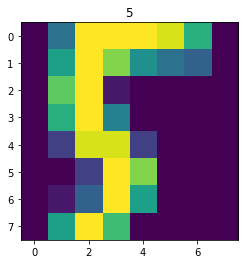

In [27]:
plt.imshow(images[outliers][1])
plt.title(y[outliers][1])

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=digits.target_names,
yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'labels' is not defined

# Réduction de dimension PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
X.shape

(1797, 64)

In [30]:
model=PCA(n_components=2)
X_reduced= model.fit_transform(X)

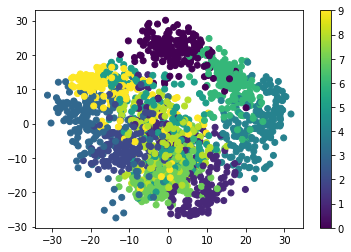

In [31]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

In [32]:
model.components_.shape

(2, 64)

In [33]:
model=PCA(n_components=64)
X_reduced=model.fit_transform(X)

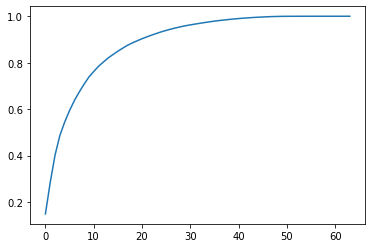

In [34]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [37]:
np.argmax(np.cumsum(model.explained_variance_ratio_))>0.99

True